                             Sobre o conjunto de dados

Visão geral:
Este conjunto de dados inclui dados para a estimativa dos níveis de obesidade em indivíduos dos países do México, Peru e Colômbia, com base em seus hábitos alimentares e condição física.
Os dados contêm 17 atributos e 2111 registros, os registros são rotulados com a variável de classe NObesity (Nível de obesidade), que permite a classificação dos dados usando os valores de Peso insuficiente, Peso normal, Sobrepeso nível I, Sobrepeso nível II, Obesidade tipo I, Obesidade tipo II e Obesidade tipo III.

                        Detalhes da base de dadosDetalhes dos dados:

Gênero: Gênero
Idade: Idade
Altura: em metros
Peso: em kgs
family_history: Algum membro da família sofreu ou sofre de excesso de peso?
FAVC: Você come alimentos altamente calóricos com frequência?
FCVC: Você costuma comer vegetais nas suas refeições?
NCP: Quantas refeições principais você faz diariamente?
CAEC: Você come alguma coisa entre as refeições?
FUMAÇA: Você fuma?
CH2O: Quanta água você bebe diariamente?
SCC: Você monitora as calorias que ingere diariamente?
FAF: Com que frequência você pratica atividade física?
TER: Quanto tempo você usa dispositivos tecnológicos como celular, videogame, televisão, computador e outros?
CALC: Com que frequência você bebe álcool?
MTRANS: Qual meio de transporte você costuma usar?
Nível de obesidade (coluna alvo): Nível de obesidade


Import das bibliotecas necessárias para a análise

In [1]:
# Import da biblioteca que irá acessar e manipular os dados
import pandas as pd

# Import da biblioteca que irá manipular, exibir e criar gráficos
import matplotlib.pyplot as plt

# Import da bivlioteca que irá possibilitar a criação de vários
# tipos de gráficos (é baseado no matplotlib)
import seaborn as sns

# Import da biblioteca que serve para manipular e
# realizar operações com arrays

import numpy as np

Acessando a base de dados

In [2]:
base_dados = pd.read_csv('Obesity prediction.csv')

Analisando as 10 primeiras linhas

In [45]:
base_dados.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Para facilitar o trabalho, vamos renomear as colunas da tabela

In [3]:
base_dados.rename(columns={
    
    'Gender': 'Genero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history':'Historico_Familiar',
    'FAVC': 'Frequencia_em_alimentos_caloricos',
    'FCVC': 'Come_vegetais_nas_refeiçoes',
    'NCP': 'Quant_refeiçoes_principais',
    'CAEC':'Come_algo_entre_as_refeiçoes',
    'SMOKE': 'Fuma',
    'CH2O': 'Quant_agua_ingerida_diariamente',
    'SCC': 'Monitora_calorias_diariamente',
    'FAF': 'Frequencia_de_atividade_fisica',
    'TUE': 'Tempo_em_dispositivos_eletronicos',
    'CALC':'Frequencia_que_ingere_alcool',
    'MTRANS': 'Transporte_utilizado',
    'Obesity': 'Nivel_Obesidade'
    
    
}, inplace=True)

Verificando se as colunas foram alteradas

In [47]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Verificando o tipo de cada tabela

In [48]:
base_dados.dtypes

Genero                                object
Idade                                float64
Altura                               float64
Peso                                 float64
Historico_Familiar                    object
Frequencia_em_alimentos_caloricos     object
Come_vegetais_nas_refeiçoes          float64
Quant_refeiçoes_principais           float64
Come_algo_entre_as_refeiçoes          object
Fuma                                  object
Quant_agua_ingerida_diariamente      float64
Monitora_calorias_diariamente         object
Frequencia_de_atividade_fisica       float64
Tempo_em_dispositivos_eletronicos    float64
Frequencia_que_ingere_alcool          object
Transporte_utilizado                  object
Nivel_Obesidade                       object
dtype: object

Verificando a quantidade de valores nulos

In [49]:
base_dados.isnull().sum()

Genero                               0
Idade                                0
Altura                               0
Peso                                 0
Historico_Familiar                   0
Frequencia_em_alimentos_caloricos    0
Come_vegetais_nas_refeiçoes          0
Quant_refeiçoes_principais           0
Come_algo_entre_as_refeiçoes         0
Fuma                                 0
Quant_agua_ingerida_diariamente      0
Monitora_calorias_diariamente        0
Frequencia_de_atividade_fisica       0
Tempo_em_dispositivos_eletronicos    0
Frequencia_que_ingere_alcool         0
Transporte_utilizado                 0
Nivel_Obesidade                      0
dtype: int64

Verificando a quantidade de linhas e colunas da tabela

In [50]:
base_dados.shape

(2111, 17)

                                     ANÁLISE DESCRITIVA

Medidas de tendência central: Calcular a média, mediana e a moda para variáveis numéricas como idade, altura, peso, quantidade de refeições principais, quantidade de água ingerida diaramente e tempo em dispositivos eletrônicos

Média: média aritmética dos valores da coluna

Moda: Valor que aparece com mais frequência em um conjunto de valores

mediana: Valor que se encontra no centro de um conjunto de valores.

Visualizando novamente os nomes das colunas para facilitar a criação da solução

In [51]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

primeiro, vamos criar uma função para facilitar o nosso processo, já que, com a
criação dela, não precisaremos repetir o processo várias vezes

In [4]:
# A função terá como objetivo mostrar no console a média, a mediana e a moda
# de cada coluna. A função ira receber como parametro o nome da coluna que 
# terá os valores impressos

# Criação da função que ira imprimir os valores
def imprimirValores(coluna):
    
    # impressão dos valores
    
    # Name: Ira mostrar o nome da coluna informada nos colchetes da base de dados
    
    # round: Serve para arredontar os valores. Basicamente, ele analisa se o primeiro
    # valor após a virgula é menor ou maior que 5, se for maior ele arredonta pra cima,
    # se for menor que 5 ele arredonta pra baixo. A função recebe 2 valores o valor e 
    # a quatidade de casas decimais que devem aparecer após a virgula.
    
    # mean: Cálcula a média dos valores
    
    # median: calcula a mediana dos valores
    
    # mode: Cálcula a moda dos valores. Ira retorna 2 valores: o indice da moda 
    # (pois pode haver mais de uma moda) e o valor da moda em si
    
    print("Média dos valores da coluna de ", base_dados[coluna].name,": ", round(base_dados[coluna].mean(), 2))
    
    print("Mediana dos valores da coluna de ", base_dados[coluna].name,": ", round(base_dados[coluna].median(), 2))
    
    print("Moda dos valores da coluna de ", base_dados[coluna].name,": ", round(base_dados[coluna].mode(), 2))

Calculando os valores da idade

In [53]:
# Chamada da função

imprimirValores('Idade')

Média dos valores da coluna de  Idade :  24.31
Mediana dos valores da coluna de  Idade :  22.78
Moda dos valores da coluna de  Idade :  0    18.0
Name: Idade, dtype: float64


Calculando os valores da altura

In [54]:
# Chamada da função

imprimirValores('Altura')

Média dos valores da coluna de  Altura :  1.7
Mediana dos valores da coluna de  Altura :  1.7
Moda dos valores da coluna de  Altura :  0    1.7
Name: Altura, dtype: float64


Calculando os valores da coluna de peso

In [55]:
# Chamada da função

imprimirValores('Peso')

Média dos valores da coluna de  Peso :  86.59
Mediana dos valores da coluna de  Peso :  83.0
Moda dos valores da coluna de  Peso :  0    80.0
Name: Peso, dtype: float64


Valores da coluna de quantidade de refeições principais

In [56]:
# chamada do método

imprimirValores('Quant_refeiçoes_principais')

Média dos valores da coluna de  Quant_refeiçoes_principais :  2.69
Mediana dos valores da coluna de  Quant_refeiçoes_principais :  3.0
Moda dos valores da coluna de  Quant_refeiçoes_principais :  0    3.0
Name: Quant_refeiçoes_principais, dtype: float64


Valores da coluna de quantidade de agua ingerida diariamente

In [57]:
# chamada da função

imprimirValores('Quant_agua_ingerida_diariamente')

Média dos valores da coluna de  Quant_agua_ingerida_diariamente :  2.01
Mediana dos valores da coluna de  Quant_agua_ingerida_diariamente :  2.0
Moda dos valores da coluna de  Quant_agua_ingerida_diariamente :  0    2.0
Name: Quant_agua_ingerida_diariamente, dtype: float64


Valores da coluna de quantidade de tempo em dispositivos eletrônicos

In [58]:
# Chamada da função

imprimirValores('Tempo_em_dispositivos_eletronicos')

Média dos valores da coluna de  Tempo_em_dispositivos_eletronicos :  0.66
Mediana dos valores da coluna de  Tempo_em_dispositivos_eletronicos :  0.63
Moda dos valores da coluna de  Tempo_em_dispositivos_eletronicos :  0    0.0
Name: Tempo_em_dispositivos_eletronicos, dtype: float64


Medidas de dispersão: Calcular o desvio padrão e variância para as mesmas
variáveis

Desvio padrão: distância que os valores estão da média 

Variância:  A variância nos mostra a dispersão dos dados em relação à média, mas ela é expressa em unidades ao quadrado. Isso significa que, se os dados originais forem em metros, a variância estará em metros quadrados. Essa unidade pode dificultar a interpretação direta.

Vamos seguir a mesma pratica de anteriormente, vamos criar uma função
para realizar a mesma tarefa quantas vezes for necessária

In [59]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

In [5]:
# Função que irá calcular a variância e o desvio padrão 
# das colunas numéricas
def calc_desvio_variancia(coluna):
    
    # Variável que irá conter a função std da biblioteca numpy 
    # que tem como objetivo calcular o desvio padrão de uma
    # coluna numérica
    desvio_padrao = np.std(base_dados[coluna])
    
    # Variável que irá conter a função var da biblioteca numpy
    # que tem como objetivo calcular a variância de uma coluna
    # numérica.
    variancia = np.var(base_dados[coluna])
    
    # Impressão dos resultados com o round que ira limitar a aparição de casas após a virgula, 
    # no nosso caso queremos apenas 2 casas após a virgula.
    # O name ira capturar apenas o nome da coluna
    print('Desvio padrão da coluna de ', base_dados[coluna].name,": ", round(desvio_padrao, 2))
    print('Variância da coluna de ', base_dados[coluna].name,": ", round(variancia, 2))
    
    

Desvio padrão e variância da coluna de idade

In [61]:
calc_desvio_variancia('Idade')

Desvio padrão da coluna de  Idade :  6.34
Variância da coluna de  Idade :  40.25


Desvio padrão e variância da coluna de altura

In [62]:
calc_desvio_variancia('Altura')

Desvio padrão da coluna de  Altura :  0.09
Variância da coluna de  Altura :  0.01


Desvio padrão e variância da coluna de peso

In [63]:
calc_desvio_variancia('Peso')

Desvio padrão da coluna de  Peso :  26.18
Variância da coluna de  Peso :  685.65


Desvio padrão e variância da coluna de quantidade de refeições principais

In [64]:
calc_desvio_variancia('Quant_refeiçoes_principais')

Desvio padrão da coluna de  Quant_refeiçoes_principais :  0.78
Variância da coluna de  Quant_refeiçoes_principais :  0.61


Desvio padrão e variância da coluna de quantidade de agua ingerida diariamente

In [65]:
calc_desvio_variancia('Quant_agua_ingerida_diariamente')

Desvio padrão da coluna de  Quant_agua_ingerida_diariamente :  0.61
Variância da coluna de  Quant_agua_ingerida_diariamente :  0.38


Variância e desvio padrão da coluna de tempo em dispositivos eletrônicos

In [66]:
calc_desvio_variancia('Tempo_em_dispositivos_eletronicos')

Desvio padrão da coluna de  Tempo_em_dispositivos_eletronicos :  0.61
Variância da coluna de  Tempo_em_dispositivos_eletronicos :  0.37


Frequências: Contar a frequência de cada categoria para variáveis categóricas
como gênero, histórico familiar, se a pessoa fuma ou não e o transporte utilizado.

Definição: A frequência representa a quantidade de vezes que os valores únicos de uma coluna
aparecem, por exemplo, podemos calcular quantas vezes o valor categórico "sim" aparece em uma 
tabela.
Ela pode ser dividida em:

frequencia absoluta: Quantidade de vezes que o valor aparece.

frequência relativa: Porcentagem das vezes que o valor aparece.

Criação da função que irá calcular a frequência de cada valor nas colunas categóricas

In [6]:
# Função que ira calcular a frequência dos valores.
# A função irá receber como parametro o nome da 
# coluna que queremos calcular a frequência.
def calc_frequencia(coluna_categorica):
    
    # Variável que irá conter a função value_counts que tem como objetivo
    # contar a quantidade de vezes um valor aparece na coluna. A função
    # recebe como parametro o normalize=True que tem como objetivo calcular
    # a frequência relativa (porcentagem das vezes que o valor aparece) dos
    # valores da coluna.
    calculo_frequência = base_dados[coluna_categorica].value_counts(normalize=True)
    
    # impressão dos resultados usando o round que ira limitar a aparição de casas decimais
    # após a virgula, no nosso caso iremos limitar a apenas 2 casas decimais
    print('Calculo da frequência dos valores da coluna: ', round(calculo_frequência,2))
    
    

Visualizando as colunas para facilitar a chamada da função

In [68]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Frequência relativa (porcentagem) dos valores da coluna de generos

In [69]:
calc_frequencia('Genero')

Calculo da frequência dos valores da coluna:  Genero
Male      0.51
Female    0.49
Name: proportion, dtype: float64


frequência relativa (porcentagem) da coluna de históricos familiar

In [70]:
calc_frequencia('Historico_Familiar')

Calculo da frequência dos valores da coluna:  Historico_Familiar
yes    0.82
no     0.18
Name: proportion, dtype: float64


Porcentagem relativa (porcentagem) da coluna Fuma

In [71]:
calc_frequencia('Fuma')

Calculo da frequência dos valores da coluna:  Fuma
no     0.98
yes    0.02
Name: proportion, dtype: float64


Porcentagem relativa da coluna de transportes utilizados

In [72]:
calc_frequencia('Transporte_utilizado')

Calculo da frequência dos valores da coluna:  Transporte_utilizado
Public_Transportation    0.75
Automobile               0.22
Walking                  0.03
Motorbike                0.01
Bike                     0.00
Name: proportion, dtype: float64


Tabelas de Contingência: Criar tabelas cruzadas para analisar a relação entre duas variáveis categóricas, por exemplo, genêro e nivel de obesidade

Primeiro vamos filtrar apenas as colunas categóricas para facilitar a 
visualização das colunas que temos que trabalhar.

Tabelas cruzadas: Uma tabela cruzada, também conhecida como tabulação cruzada ou tabela de contingência, é uma ferramenta estatística que permite comparar os resultados de duas ou mais variáveis categóricas. Ela organiza os dados em uma tabela, cruzando as categorias de cada variável para mostrar a frequência com que ocorrem em conjunto.

In [7]:
# Vamos usar o a função select_dtypes do pandas que tem como objetivo
# filtrar as colunas por tipo de dados. A função recebe como parametro
# o include = ['tipo do dado que você quer filtrar']
colunas_categoricas = base_dados.select_dtypes(include=['object'])

Verificando as colunas categóricas

In [8]:
colunas_categoricas.columns

Index(['Genero', 'Historico_Familiar', 'Frequencia_em_alimentos_caloricos',
       'Come_algo_entre_as_refeiçoes', 'Fuma', 'Monitora_calorias_diariamente',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Agora, vamos criar uma função que ira construir as tabelas cruzadas entre 2 variáveis
categóricas

Observação: Irei analisar individualmente cada tabela cruzada.

In [9]:
# Função que ira criar as tabelas cruzadas. A função ira receber como parametro o nome das 2 colunas que serão utilizadas na construção da tabela 
# cruzada.

def tabela_cruzada(coluna1, coluna2):
    
    # Ira receber a função do pandas que ira construir a tabela cruzada 
    tabela = pd.crosstab(colunas_categoricas[coluna1], colunas_categoricas[coluna2])
    
    return tabela

Primeiro, vamos fazer a relação entre gênero e nivel de obesidade

Como vamos observar abaixo, para realizarmos uma análise um pouco mais detalhada teremos que pontuar a diferença percentual entre os valores,para
isso, vamos criar uma função que seguira a segunite fórmula matemática
para calculos de diferenças percentuais.

Calculo da porcentagem:

Diferença: valor maior  - valor menor

Dividindo pela base = diferença / valor menor

porcentagem = resulta da divisão pela base * 100 



Criação da função de calculos percentuais

In [10]:
# Função que ira calcular a diferença percentual. A 
# A função irá receber 2 argumentos o valor maior
# e o valor menor
def calc_diferenca_percentual(valormaior, valormenor):
    
    diferenca = valormaior - valormenor
    
    divisao_pela_base = diferenca / valormenor
    
    porcentagem = divisao_pela_base * 100
    
    # Retorno do valor que queremos descobrir
    return porcentagem
    

In [77]:
tabela_cruzada('Genero', 'Nivel_Obesidade')

Nivel_Obesidade,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Genero,,,,,,,
Female,173,141,156,2,323,145,103
Male,99,146,195,295,1,145,187


In [78]:
# Chamada da função de cálculos de porcentagem

calc_diferenca_percentual(187, 103)

81.55339805825243

Conclusão da tabela: Analisando a tabela, percebemos que no geral os homens sofrem com o peso mais do
que as mulheres, entretanto, os casos em que as mulheres sofrem mais, o valor é muito discrepante,
sendo muito maior que os dos homens, como no caso da obesidade 3 por exemplo.

Peso insuficiente: O grupo das mulheres com peso insuficiente é 74% maior que o grupo de homens com
peso insuficiente

peso normal: O grupo de homens com peso normal é 3.54% maior que o grupo de mulheres com
peso normal

obesidade tipo 1:  O grupo de homens com obesidade tipo 1 é 25% maior que o grupo de mulheres com
obesidade tipo 1

Obesidade tipo 2:  O grupo de homens com obesidade tipo 2 é 14650% maior que o grupo de mulheres com
obesidade tipo 2.

Obesidade tipo 3:  O grupo das mulheres com obesidade tipo 3 é 32200% maior que o grupo de homens com
obesidade tipo 3

sobrepeso nivel 1: não há diferença entre os valores

sobrepeso nivel 2:  O grupo dos homens com sobrepeso nivel 2  é 81.53% maior que o grupo das mulheres com
sobrepeso nivel 2

validação entre o histórico familiar e a frequencia de calorias consumidas

In [79]:
tabela_cruzada('Historico_Familiar', 'Frequencia_em_alimentos_caloricos')

Frequencia_em_alimentos_caloricos,no,yes
Historico_Familiar,,
no,99,286
yes,146,1580


In [80]:
# Chamada da função de calculo de diferenças percentuais

calc_diferenca_percentual(1580, 286)

452.4475524475524

Conclusão da tabela: podemos observar que pessoas com histórico familiar 
consomem 452% mais alimentos calóricos que as pessoas sem histórico familiar.

Relação entre a frequência de consumo de alimentos calóricos e o 
nivel de obesidade

In [81]:
tabela_cruzada('Frequencia_em_alimentos_caloricos', 'Nivel_Obesidade')

Nivel_Obesidade,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Frequencia_em_alimentos_caloricos,,,,,,,
no,51,79,11,7,1,22,74
yes,221,208,340,290,323,268,216


In [82]:
# Chamada da função de cálculo de diferenças percentuais

calc_diferenca_percentual(221, 51)

333.33333333333337

Conclusão da tabela: Podemos observar que pessoas com consomem calorias frequentemente possuem um
nivel bem mais alto em todas as categorias do que pessoas que não consomem calorias frequentemente



peso insuficiente: o grupo de pessoas que consomem calorias é 333% maior que o grupo de pessoas que não
consomem calorias frequentemente

peso normal: o grupo de pessoas que consomem calorias é 163% maior que o grupo de pessoas que não
consomem calorias frequentemente.

obesidade tipo 1: o grupo de pessoas que consomem calorias é 2990% maior que o grupo de pessoas que não
consomem calorias frequentemente. 

Obesidade tipo 2: o grupo de pessoas que consomem calorias é 4042% maior que o grupo de pessoas que não
consomem calorias frequentemente.

Obesidade tipo 3: o grupo de pessoas que consomem calorias é 32200% maior que o grupo de pessoas que não
consomem calorias frequentemente.

Sobrepeso nivel 1: o grupo de pessoas que consomem calorias é 1118% maior que o grupo de pessoas que não
consomem calorias frequentemente.

sobrepeso nivel 2: o grupo de pessoas que consomem calorias é 191% maior que o grupo de pessoas que não
consomem calorias frequentemente.

relação entre o transporte utilizado e o nivel de obesidade

In [83]:
# Chamada da função de construção de tabelas cruzadas
tabela_cruzada('Nivel_Obesidade', 'Transporte_utilizado')

Transporte_utilizado,Automobile,Bike,Motorbike,Public_Transportation,Walking
Nivel_Obesidade,,,,,
Insufficient_Weight,46,0,0,220,6
Normal_Weight,45,4,6,200,32
Obesity_Type_I,110,0,3,236,2
Obesity_Type_II,95,1,0,200,1
Obesity_Type_III,1,0,0,323,0
Overweight_Level_I,66,2,1,212,9
Overweight_Level_II,94,0,1,189,6


In [84]:
# Chamada da função de calculo de diferenças percentuais

calc_diferenca_percentual(323, 200)

61.5

Conclusão da tabela: De modo geral, podemos observar que, boa parte
das categorias de peso possuem uma grande quantidade de pessoas que
andam de transporte público e veiculos automotivos, o que pode indicar
que a falta de exercicios fisicos (no caso uma caminhada até o destino)
pode cooperar com os problemas de obesidade.Tanto que o numero com obesidade
tipo 3 e que usam transporte público é 61.5% maior que o numero de pessoas
que possuem o peso normal e utilizam o transporte público. Outro fator que 
corrobora com a teoria de que a falta de caminhada auxilia nos problemas de
obesidade, é o fato de que as pessoas do grupo que caminham (walking) possuem
um peso normal, já que nas outras categorias esse grupo é extremamente menor.

Relação entre consumo de alimentos calóricos e monitoramento da ingestão calórica

In [85]:
# Chamada da função de tabelas cruzadas

tabela_cruzada('Frequencia_em_alimentos_caloricos', 'Monitora_calorias_diariamente')

Monitora_calorias_diariamente,no,yes
Frequencia_em_alimentos_caloricos,,
no,207,38
yes,1808,58


Conclusão da tabela: Podemos concluir que a maioria das pessoas que consomem alimentos calóricos com frequência não monitora a quantidade de calorias que ingere. Essa conclusão se baseia na comparação entre os números 1808 (pessoas que consomem alimentos calóricos com frequência e não monitoram) e 58 (pessoas que consomem alimentos calóricos com frequência e monitoram).

                        Análise exploratória dos dados

                                Visualizações

Histograma: Visualizar a distribuição de variaveis numéricas como idade, peso e altura.

Primeiro vamos filtrar as colunas numéricas usando o select_dtypes

In [11]:
colunas_numericas = base_dados.select_dtypes(include=[int, float])

Visualizando as colunas numéricas

In [12]:
colunas_numericas.columns

Index(['Idade', 'Altura', 'Peso', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Quant_agua_ingerida_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos'],
      dtype='object')

Como vamos ter que criar um histograma pra cada coluna numérica vamos criar uma função de criação de histogramas

In [13]:
# Função que irá criar histogramas: A função irá receber como argumento
# a coluna que será utilizada na análise, a cor da barra e a largura
# da barra (argumento que será opcional, sendo assim, ela rrecebe como
# valor padrão o None(nenhum))
def criar_histograma(coluna, cor_da_barra, largura_da_barra = None):
    
    # Ira criar o titulo do gráfico
   plt.title(f'Histograma da coluna de {coluna}')
    
    # Ira definir o rótulo do eixo x
   plt.xlabel(f'{coluna}')
    
    # Irá definir o rótulo do eixo y
   plt.ylabel('Quantidade de pessoas')
    
    # Como o parametro width não aceita o tipo None, vamos fazer uma validação
    # que ira verificar se o argumento foi ou não passado na função. Basicamente
    # vamos verificar se o None foi substituido por um valor numérico (valor
    # da largura da barra)
   if largura_da_barra is not None:
        
        # Se o usuário passar um valor para a largura da barra, vamos passar como argumento pro 
        # plt.hist a base de dados análisada, a coluna que será utilizada na análise, a cor e a
        # largura da barra.
        plt.hist(data=colunas_numericas, x = coluna, color = cor_da_barra , width=largura_da_barra)
        
   else:
       
       # Caso o usuário não passe uma largura para a barra, vamos simplesmente
       # omitir o parametro width da função plt.hist
       plt.hist(data=colunas_numericas, x = coluna, color=cor_da_barra)
        
       
    
   # Ira exibir o gráfico no terminal
   plt.show()

Histograma das idades

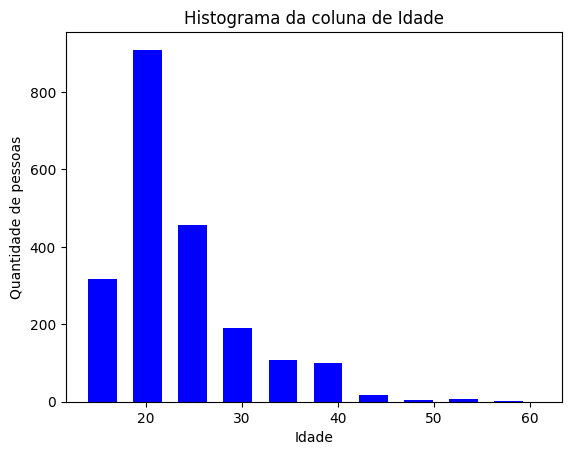

In [89]:
criar_histograma('Idade', 'blue', 3)

                                Conclusão do histograma das idades
A maioria das pessoas que fazem parte da pesquisa posuem entre 20 e 30 anos.

A minoria das pessoas das pessoas possuem mais que 50 anos e menos que 60 anos.

Podemos obeservar que a pesquisa é composta predominantemente por jovens

Histograma das alturas

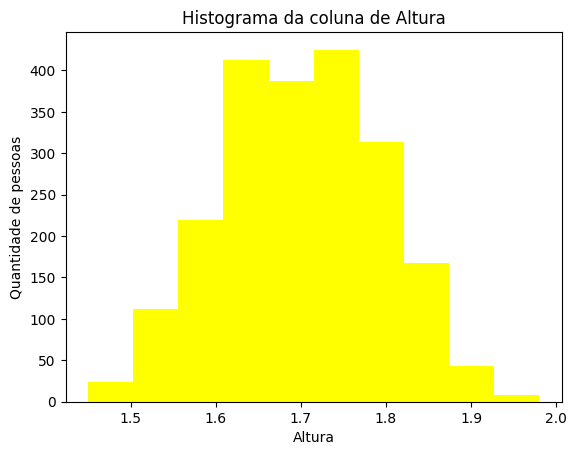

In [90]:
criar_histograma('Altura','yellow')

                                                            Conclusão dos histograma de altura
-> A maioria das pessoas estão concentradas na faixa dos 1.6 a 1.8
-> A minoria das pessoas estão concentradas na dos 1.9 a 2.0.
-> A quantidade de pessoas que possuem 1.9 de altura é maior 
que a quantidade de pessoas que possuem 1.5 de altura.
-> O grupo das pessoas na faixa dos 1.7 a 1.8 ultrapassa dos 400 
integrantes

Histograma dos pesos

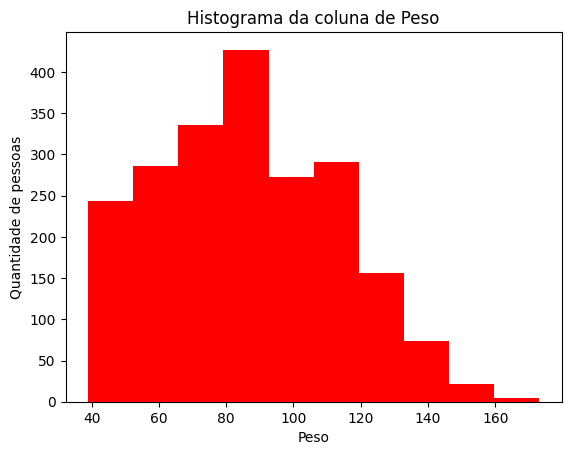

In [91]:
criar_histograma('Peso', 'red')

                                                                     Conclusão do histograma de pesos
-> Boa parte das pessoas possuem o peso na faixa dos 60 e 80 kilos

-> A minoria das pessoas possuem mais de 160 kilos

-> Podemos observar que a faixa dos 120 e 160 são menores que as demais
faixas



 Histogramas das pessoas que comem vegetais nas refeições

Como estamos lidando com quantidade de vegetais, talvez o formato de inteiros
seja o mais adequado.

In [16]:
# Conversão de float para inteiro: Primeiro vamos acessar a coluna
# de quantidade de vegetais. Depois, o astype irá converter todos os valores
# de float para int. A função irá receber conmo parametro
colunas_numericas['Come_vegetais_nas_refeiçoes'] = colunas_numericas['Come_vegetais_nas_refeiçoes'].astype(int)

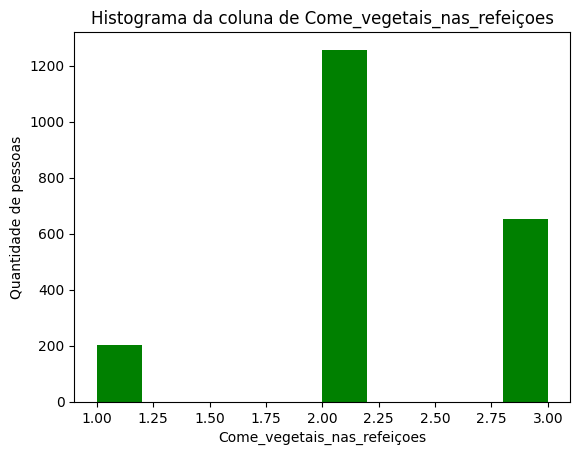

In [93]:
criar_histograma('Come_vegetais_nas_refeiçoes', 'green')

Antes de análisar a conclusão vamos verificar a quantidade de vegetais que cada pessoa
consumiu

In [17]:
colunas_numericas['Come_vegetais_nas_refeiçoes'].value_counts()

Come_vegetais_nas_refeiçoes
2    1257
3     652
1     202
Name: count, dtype: int64

Agora, vamos criar uma função para calcular a porcentagem de pessoas
que consumiram uma determinada quantidade de vegetais (no caso, a porcentagem
que consumiu vegetais 1, 2 ou 3 vezes)

In [20]:
# Função que irá calcular a porcentagem de pessoas que consome algo
# ou realizam determinada ação
def calc_porcentagem_pessoas(coluna, valor):
    
    # Ira filtrar os valores diferentes 0, pois, eles não devem
    # entrar na contagem (principalmente quando convertemos as 
    # colunas de float para inteiro)
    valores_diferentes_de_0 = colunas_numericas[coluna] != 0
    
    # Ira receber o total de colunas diferentes de 0
    total_pessoas = valores_diferentes_de_0.sum()
    
    # Cálculo da porcentagem
    porcentagem = (valor / total_pessoas) * 100
    
    # Impressão dos resultados.
    print('Das ', total_pessoas, ' entrevistadas,', round(porcentagem,2),'%',' das pessoas consomem essa quantidade')

In [21]:
# Chamada da função
calc_porcentagem_pessoas('Come_vegetais_nas_refeiçoes', 1257)

Das  2111  entrevistadas, 59.55 %  das pessoas consomem essa quantidade


                                                                    Conclusão do histograma de quantidade de vegetais
-> Dos 2116 entrevistados,a maioria das pessoas (59.55%) comem 2 vezes vegetais nas refeições

-> A minoria das pessoas (9.57%) comem vegetais apenas 1 vez

-> uma quantidade consideravel de pessoas (30.89%) comem vegetais 3 vezes em suas refeições

Histograma da quantidade de refeições principais

Como nesse caso também vamos falar de quantidade, precisamos converter para inteiro

In [22]:
# Vamos selecionar a coluna que queremos trabalhar e converter os valores
# para inteiro usando o astype
colunas_numericas['Quant_refeiçoes_principais'] = colunas_numericas['Quant_refeiçoes_principais'].astype(int)

Analisando a quantidade de pessoas de maneira mais exata

In [98]:
colunas_numericas['Quant_refeiçoes_principais'].value_counts()

Quant_refeiçoes_principais
3    1362
1     395
2     285
4      69
Name: count, dtype: int64

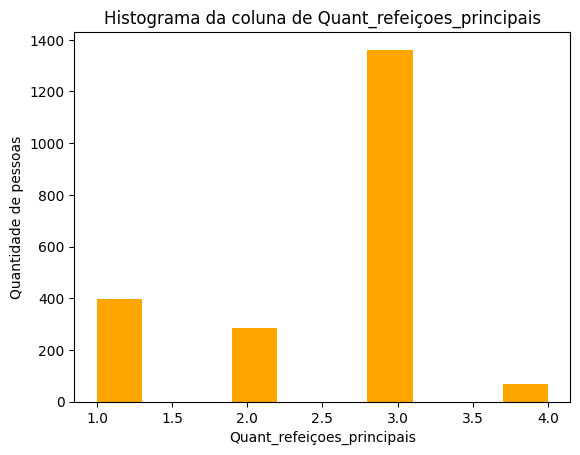

In [99]:
criar_histograma('Quant_refeiçoes_principais', 'orange')

Para aprimorar a nossa análise vamos chamar a função de cálculo de porcentagens

In [100]:
calc_porcentagem_pessoas('Quant_refeiçoes_principais',  69)

Das  2111  entrevistadas, 3.27 %  das pessoas consomem essa quantidade


                                                               Conclusão do histograma de quantidade de refeições principais
-> A maioria dos entrevistados (64,52%) fazem 3 refeições por dia

-> Em segundo lugar, temos o grupo que faz apenas 1 refeição por dia.
Esse grupo representa 18,71% dos entrevistados.

-> No grupo das pessoas que fazem apenas 2 refeições por dia, temos
13,5% dos entrevistados

-> Já a minoria dos entrevistados (3,27%) fazem 4 refeiçoes por dia.

Histograma da quantidade de refeições principais

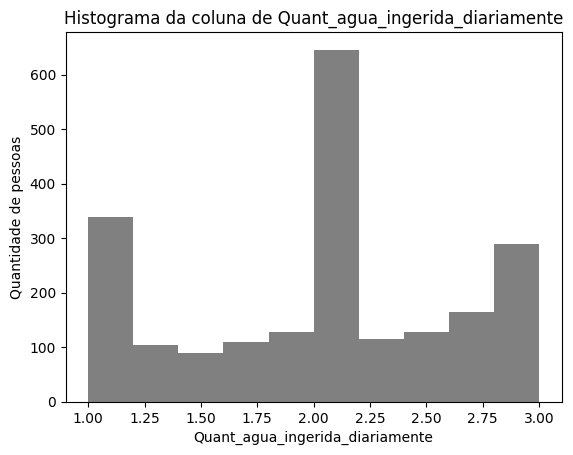

In [101]:
criar_histograma('Quant_agua_ingerida_diariamente', 'gray')

Visualizando os numeros com mais precisão: Para facilitar a nossa análise vamos verificar os valores usando o value counts com o intuito de tornar
a nossa análise mais assertiva

In [102]:
colunas_numericas['Quant_agua_ingerida_diariamente'].value_counts()

Quant_agua_ingerida_diariamente
2.000000    448
1.000000    211
3.000000    162
1.636326      3
2.825629      3
1.876915      2
2.450069      2
1.490613      2
2.115967      2
2.137550      2
1.179942      2
1.229915      2
2.426465      2
1.656082      2
1.984323      2
2.843777      2
1.439962      2
2.174248      2
2.371015      2
2.530035      2
2.184707      2
2.406541      2
2.444125      2
2.654702      2
2.147746      2
1.031354      2
2.320068      1
1.650612      1
1.610768      1
1.796267      1
1.728139      1
2.005130      1
2.054193      1
2.852339      1
1.792022      1
2.074048      1
2.456581      1
1.527036      1
1.322669      1
1.569082      1
2.650989      1
2.027984      1
1.253803      1
1.298165      1
1.632004      1
2.099863      1
1.863930      1
1.049134      1
1.530531      1
2.721769      1
2.730500      1
1.787843      1
2.673835      1
1.773236      1
2.622638      1
2.911187      1
2.310921      1
2.148146      1
2.157395      1
2.894678      1
2.025279

Chamando a função de cálculo de percentuais de pessoas

In [111]:
calc_porcentagem_pessoas('Quant_agua_ingerida_diariamente', 162)

Das  2111  entrevistadas, 7.67 %  das pessoas consomem essa quantidade


                Conclusão do histograma de quantidade de água ingerida
-> A maioria dos entrevistados (21,22%) consomem 2 litros de água por dia

-> Em segundo lugar temos o grupo que ingere apenas 1 litro de água por
dia (10% das pessoas)

-> Ja á minoria das pessoas(7,67% das pessoas) consomem 3 litros de água por dia

-> Nessa análise foram consideradas os totais de pessoas de cada faixa ou seja, a quantidade total de pessoas que ingerem 1, 2 ou 3 litros de água 
por dia


Histograma das frequências de atividades fisicas

Como a frequência de atividade fisica se refere a quantidade de vezes que uma
pessoa prática exercicios fisicos ou vai á academia, precisamos converter esses valores de float para inteiros

In [23]:
# Priemeiro vamos selecionar a coluna que queremos converter e depois usarameos a função astype
# para converter todos os valores da coluna para inteiro
colunas_numericas['Frequencia_de_atividade_fisica'] = colunas_numericas['Frequencia_de_atividade_fisica'].astype(int)

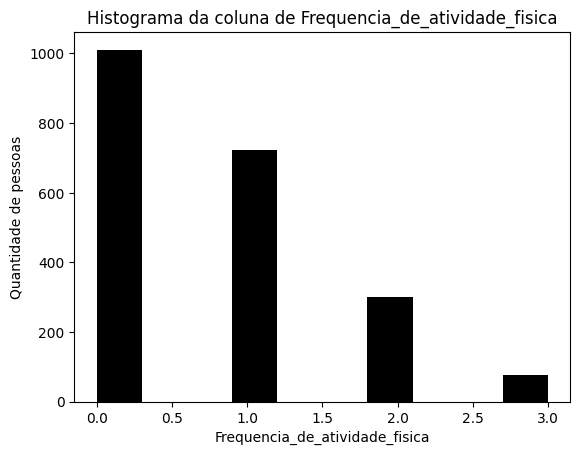

In [127]:
criar_histograma('Frequencia_de_atividade_fisica','black')

Verificando os valores com mais precisão

In [129]:
colunas_numericas['Frequencia_de_atividade_fisica'].value_counts()

Frequencia_de_atividade_fisica
0    1011
1     724
2     301
3      75
Name: count, dtype: int64

Como nesse caso temos a contagem de pessoas que não praticam exercicios fisicos, vamos calcular manualmente a porcentagem de cada categoria, pois,
a nossa função de calculos percentuais de pessoas filtra valores diferentes
de 0.

In [24]:
total_pessoas = colunas_numericas['Frequencia_de_atividade_fisica'].sum()

nao_praticam_exercicio = (1011 / total_pessoas) * 100

praticam_1_vez = (724 / total_pessoas) * 100

praticam_2_vezes = (301 / total_pessoas) * 100  

praticam_3_vezes = (75 / total_pessoas) * 100

print('Porcentagem de pessoas que não praticam exercicios: ', round(nao_praticam_exercicio,2))

print('Porcentagem de pesssoas que praticam apenas 1 vez: ', round(praticam_1_vez, 2))

print('Porcentagem de pesssoas que praticam 2 vezes: ', round(praticam_2_vezes, 2))

print('Porcentagem de pessoas que praticam 3 vezes: ', round(praticam_3_vezes, 2))

Porcentagem de pessoas que não praticam exercicios:  65.18
Porcentagem de pesssoas que praticam apenas 1 vez:  46.68
Porcentagem de pesssoas que praticam 2 vezes:  19.41
Porcentagem de pessoas que praticam 3 vezes:  4.84


                                                               Conclusão do histograma de frequências de atividades fisicas
-> 65.18%% das pessoas não praticam atividades fisicas, que no caso desse histograma,
é a maioria das pessoas.

-> Das pessoas que praticam exercicios, 46.68% (que é a maioria do grupo dos que praticam 
exercicios) fazem exercicios 1 vez por semana.

-> 19,41% das pessoas fazem exercicios 2 vezes por semana.

-> Do grupo que pratica exercicios mais vezes durante a semana, apenas 4.84% das pessoas
fazem exercicios 3 vezes por dia, que é a minoria das pessoas entrevistadas.

histograma do tempo em dispositivos eletrônicos

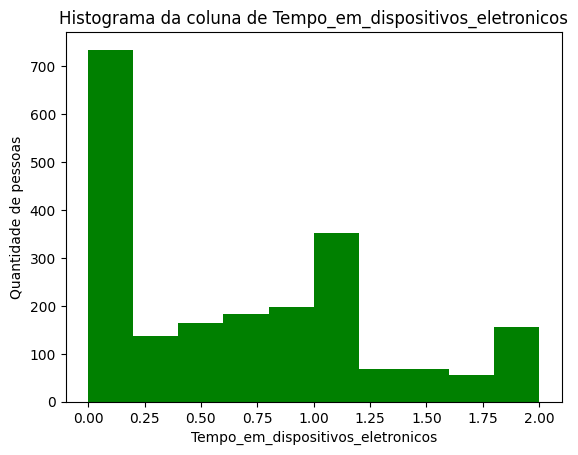

In [148]:
criar_histograma('Tempo_em_dispositivos_eletronicos','green')

Visualizando os valores com mais precisão

In [155]:
colunas_numericas['Tempo_em_dispositivos_eletronicos'].value_counts()

Tempo_em_dispositivos_eletronicos
0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
0.002600      3
0.828549      2
0.105895      2
0.369134      2
1.339232      2
0.555468      2
0.374650      2
0.479221      2
1.592570      2
1.365950      2
1.415536      2
1.358163      2
1.875023      2
0.677909      2
0.997400      2
0.469735      2
0.371941      2
0.009254      2
0.832400      2
0.265790      2
0.625350      2
0.465444      1
0.484165      1
0.455823      1
0.413106      1
0.912457      1
0.931455      1
0.897924      1
0.906247      1
0.599270      1
0.646288      1
0.586035      1
0.256382      1
1.547086      1
1.906141      1
1.639326      1
0.714627      1
0.474836      1
1.488372      1
0.556245      1
1.894105      1
1.839862      1
1.380204      1
1.273333      1
0.220029      1
0.038380      1
1.679149      1
0.875464      1
1.009632      1
0.152985      1
0.635867      1
0.097234      1
1.366355      1
0.720454      1
0.322307      1
0.9398

Vamos novamente fazer manualmente já que nesse caso também consideramos quem também não
utiliza dispositivos eletrônicos. Nesse caso também vamos considerar na análise, apenas
o total que é formado pelas faixas de tempo que representam as categorias 0 (não utilizam
dispositivos eletronicos), 1 hora, 2 horas.

In [25]:
total_pessoas = colunas_numericas['Tempo_em_dispositivos_eletronicos'].sum()

nao_utilzam = (557 / total_pessoas) * 100

utilizam_1_hora = (292 / total_pessoas) * 100

utilizam_2_horas = (109 / total_pessoas) * 100

print('Porcentagem das pessoas que não utilizam dispositivos eletrônicos: ', round(nao_utilzam, 2))

print('Porcentagem das pessoas que utilizam dispositivos eletrônicos por 1 hora: ', round(utilizam_1_hora, 2))

print('Porcentagem das pessoas que utilzam dispositivos eletrônicos durante 2 horas: ', round(utilizam_2_horas, 2))

print('Total de entrevistados: ', round(total_pessoas, 2))

Porcentagem das pessoas que não utilizam dispositivos eletrônicos:  40.11
Porcentagem das pessoas que utilizam dispositivos eletrônicos por 1 hora:  21.03
Porcentagem das pessoas que utilzam dispositivos eletrônicos durante 2 horas:  7.85
Total de entrevistados:  1388.75


                                                       Conclusão do histograma de tempo em dispositivos eletrônicos
-> A maioria das pessoas (40,11 %) não utilizam dispositivos eletrônicos

-> Do grupo que utiliza dispositivos eletrônicos, a maioria utiliza por 
apenas 1 hora, sendo 21,03% das pessoas

-> Ja a minoria dos entrevistados utilizam dispositivos eletrônicos por 2 horas.

-> Vale lembrar que utilizamos o total de cada faixa de horário no calculo das
porcentagens

Boxplot: Identifcar outliers e comparar a distribuição de variáveis 
numéricas entre grupos (por exemplo, homens e mulheres).

A minha idéia é criar uma função que cria subplots que irá colocar 
2 boxplots um do lado do outro para verificarmos a distribuição dos
dados entre os grupos de variáveis numéricas.

In [38]:

# Função que irá criar os subplots de boxplot: A função ira receber
# como argumento o nome das colunas que serão analisadas no subplot
def criar_boxplot(coluna1, coluna2 ):
    
    # Ira definir o tamanho da imagem que ira conter os 2 boxplots
    plt.figure(figsize=(15,6))
    
    # Os nossos subplots irão ter 1 linha 2 e colunas
    
    # O primeiro subplot irá ocupar o 1° espaço (que está sendo representado
    #  pelo último valor da função)
    plt.subplot(1,2,1)
    
    # Ira definir o titulo do gráfico alinhado a esquerda e com tamanho da fonte 14
    # o name serve para capturar o nome da 1° coluna
    plt.title(f'Boxplot da coluna {colunas_numericas[coluna1].name}', fontsize=14, loc='center')

    # Ira definir o rótulo do eixo usando o nome da 1° coluna
    plt.xlabel(colunas_numericas[coluna1].name)
    
    # função que irá criar o boxplot: A função receberá como argumento
    # a base de dados analisada e a 1° coluna como valor do eixo X.
    sns.boxplot(data=colunas_numericas, x=coluna1)
    
    # O segundo subplot irá ocupar o 2° espaço da imagem
    plt.subplot(1,2, 2)
    
     # Ira definir o titulo do gráfico alinhado a esquerda e com tamanho da fonte 14
     # O name serve para capturar o nome da 2° coluna
    plt.title(f'Boxplot da coluna {colunas_numericas[coluna2].name}', fontsize=14, loc='center')
    
    # Ira definir o rótulo do eixo usando o nome da 2° coluna
    plt.xlabel(colunas_numericas[coluna2].name)
    
    # função que irá criar o boxplot: A função receberá como argumento
    # a base de dados analisada e a 2° coluna como valor do eixo X.
    sns.boxplot(data=colunas_numericas, x=coluna2)
    
    # Ira exibir os gráficos
    plt.show()
    
    
    

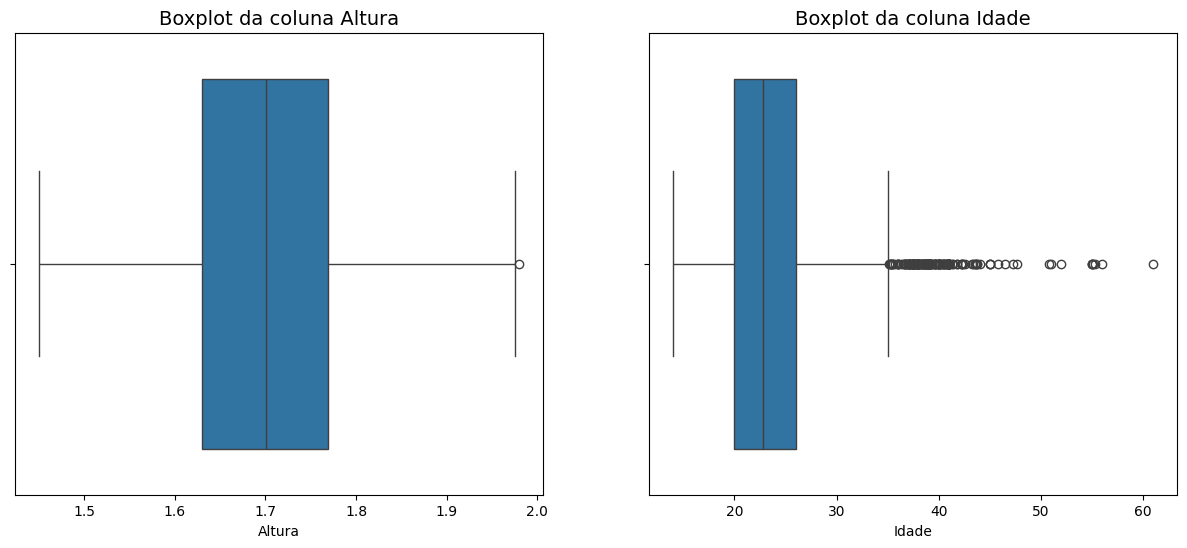

In [39]:

criar_boxplot('Altura', 'Idade')